In [1]:
from matplotlib import pyplot as plt
import pandas
import seaborn as sns

%matplotlib inline

sns.set(rc={'image.cmap': 'cubehelix'})
FIG_WIDTH=20
FIG_HEIGTH=8

In [2]:
latency = pandas.read_csv('latency-all.csv')

for terminal in []:  # use ignored_terms to skip the same as above
    try:
        latency.drop(terminal, axis=1, inplace=True)
    except ValueError:
        pass
latency.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
xterm,200.0,9.55950,3.610077,3.03,5.6475,9.460,13.1625,15.04
mlterm,200.0,10.04665,3.980015,3.75,5.4075,11.820,13.7400,15.24
kterm,200.0,10.39160,4.078467,2.21,5.4875,12.605,13.9800,17.94
mrxvt,200.0,13.61730,4.091940,3.95,11.9375,13.425,17.1275,21.63
xvt,200.0,13.94075,3.654527,7.54,11.0675,12.915,17.8950,21.09
konsole,200.0,19.57950,3.006935,13.75,16.7500,20.410,21.7800,28.35
urxvt,200.0,23.47200,1.890329,19.22,22.2725,23.670,25.0050,27.01
st,200.0,23.82570,1.943724,15.99,22.8175,23.800,25.3725,29.17
alacritty,200.0,24.18640,6.140052,8.28,22.5625,26.045,28.4850,32.33
putty,200.0,27.75480,1.930730,23.64,25.8875,28.095,29.2300,31.65


In [3]:
from tabulate import tabulate
print(tabulate(latency.describe().transpose(), headers='keys', tablefmt='pipe'))

|            |   count |    mean |     std |   min |     25% |    50% |     75% |   max |
|:-----------|--------:|--------:|--------:|------:|--------:|-------:|--------:|------:|
| xterm      |     200 |  9.5595 | 3.61008 |  3.03 |  5.6475 |  9.46  | 13.1625 | 15.04 |
| mlterm     |     200 | 10.0466 | 3.98002 |  3.75 |  5.4075 | 11.82  | 13.74   | 15.24 |
| kterm      |     200 | 10.3916 | 4.07847 |  2.21 |  5.4875 | 12.605 | 13.98   | 17.94 |
| mrxvt      |     200 | 13.6173 | 4.09194 |  3.95 | 11.9375 | 13.425 | 17.1275 | 21.63 |
| xvt        |     200 | 13.9408 | 3.65453 |  7.54 | 11.0675 | 12.915 | 17.895  | 21.09 |
| konsole    |     200 | 19.5795 | 3.00694 | 13.75 | 16.75   | 20.41  | 21.78   | 28.35 |
| urxvt      |     200 | 23.472  | 1.89033 | 19.22 | 22.2725 | 23.67  | 25.005  | 27.01 |
| st         |     200 | 23.8257 | 1.94372 | 15.99 | 22.8175 | 23.8   | 25.3725 | 29.17 |
| alacritty  |     200 | 24.1864 | 6.14005 |  8.28 | 22.5625 | 26.045 | 28.485  | 32.33 |
| putty   

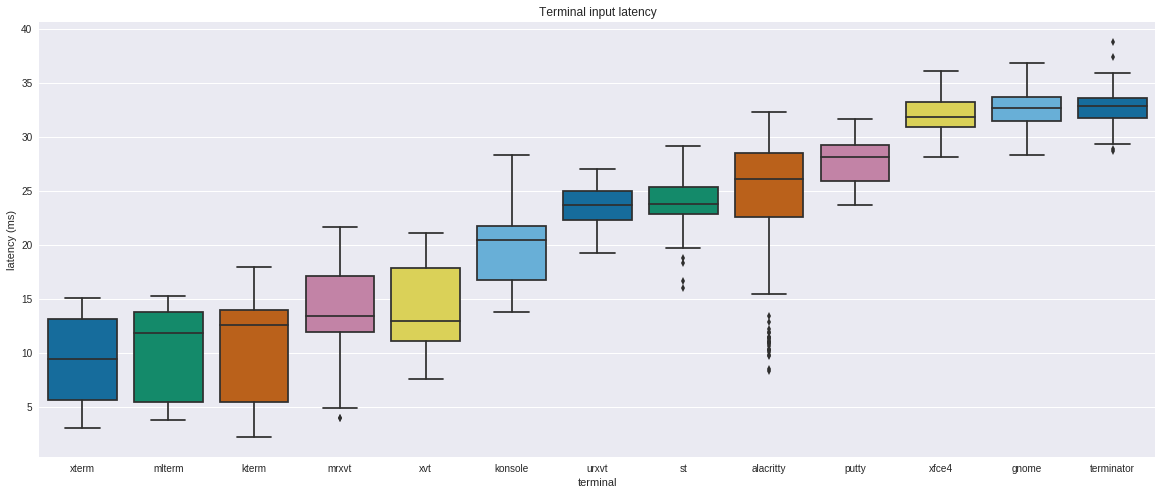

In [15]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.boxplot(data=latency, palette='colorblind')
ax.set_title('Terminal input latency')
ax.set_xlabel('terminal')
ax.set_ylabel('latency (ms)')

In [16]:
latency = pandas.read_csv('editors.csv')
latency.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
emacs,200.0,6.46015,4.353637,0.97,5.3775,6.280,6.8725,57.06
vim.gtk3,200.0,16.50690,7.922458,0.37,15.7725,20.555,21.1900,27.22
vim.gtk,200.0,3.88750,1.239527,0.67,3.6250,4.230,4.5300,11.90
vim.athena,200.0,2.80030,1.144322,0.37,2.3875,2.870,3.2325,12.67
gedit,200.0,8.90400,3.365788,2.83,6.2325,9.835,11.9825,14.22


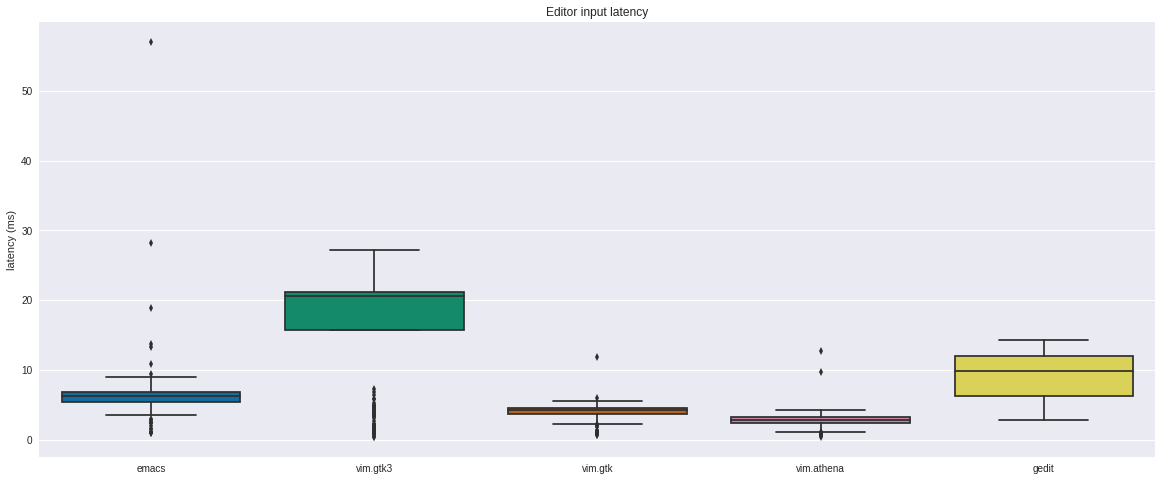

In [17]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.boxplot(data=latency, palette='colorblind')
ax.set_title('Editor input latency')
ax.set_ylabel('latency (ms)')

In [13]:
resources = pandas.read_csv('performance.csv')

ignored_terms = ['xvt',  # rare
                 'eterm',  # too old
                 'mrxvt',  # mostly like rxvt
                 'xfce4-terminal',  # like gnome-terminal
                 'xfce4',  # synonym
                 'terminator',  # synonym
                 'Terminator']  # like gnome-terminal
for terminal in ignored_terms:
    resources = resources[resources.terminal != terminal]  # rare
resources = resources.sort_values(by='time (s)')
resources.sort_values(by='time (s)')
resources.describe()

,time (s),cpu (%),memory (k)
count,9.000000,9.000000,9.000000
mean,10.961111,49.444444,1890.666667
std,9.437045,33.388288,72.027772
min,2.520000,13.000000,1800.000000
25%,3.150000,29.000000,1824.000000
50%,6.900000,38.000000,1880.000000
75%,18.670000,79.000000,1944.000000
max,26.050000,99.000000,2000.000000


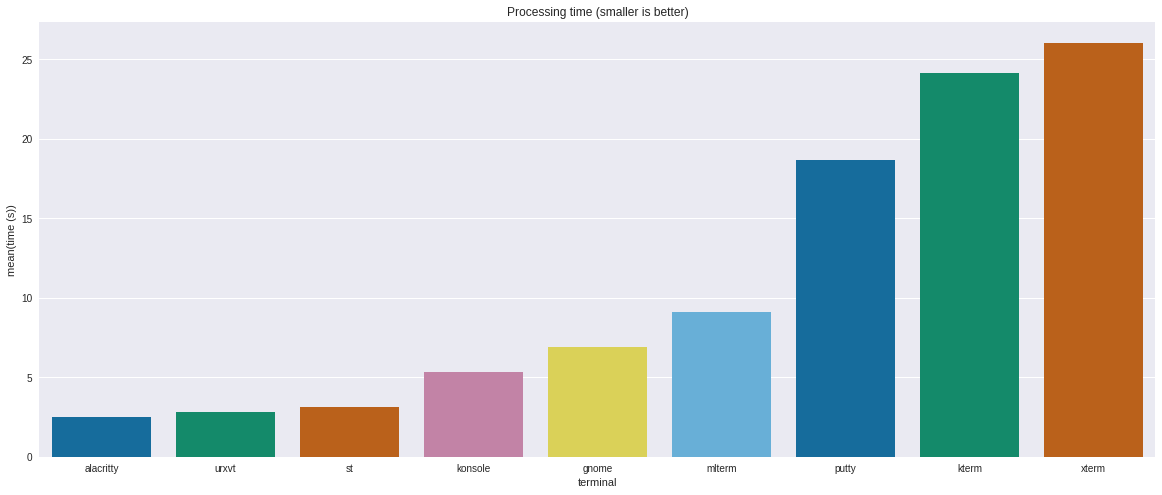

In [14]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.barplot(data=resources, x='terminal', y='time (s)', palette='colorblind')
ax.set_title('Processing time (smaller is better)')

#g = sns.PairGrid(resources,
#                 x_vars='terminal',
#                 y_vars=['time (s)', 'cpu (%)', 'memory (k)'])
#g.map(sns.barplot, palette="colorblind")
#g.fig.set_figwidth(FIG_WIDTH)
#g.fig.set_figheight(FIG_HEIGTH)

In [7]:
data = pandas.read_csv('times-100x100000.csv')
data.describe()

,time,cpu,memory
count,806.000000,806.000000,806.000000
mean,1.105881,138.888337,30745.334988
std,0.787527,25.121764,15464.080042
min,0.110000,47.000000,8324.000000
25%,0.480000,115.000000,22958.000000
50%,0.870000,127.500000,30642.000000
75%,1.970000,164.000000,48852.000000
max,3.210000,179.000000,55664.000000


In [8]:
print(data.groupby('terminal').describe().to_string())

                             cpu        memory        time
terminal                                                  
alacritty      count  100.000000    100.000000  100.000000
               mean   160.730000  29544.760000    0.492300
               std      1.906157    202.161008    0.008147
               min    156.000000  29080.000000    0.480000
               25%    159.000000  29427.000000    0.490000
               50%    161.000000  29598.000000    0.490000
               75%    162.000000  29681.000000    0.490000
               max    165.000000  29880.000000    0.530000
konsole        count  100.000000    100.000000  100.000000
               mean   138.490000  55342.520000    0.734300
               std      1.352103    130.573442    0.030126
               min    133.000000  55056.000000    0.700000
               25%    138.000000  55258.000000    0.710000
               50%    139.000000  55340.000000    0.725000
               75%    139.000000  55425.000000    0.7500

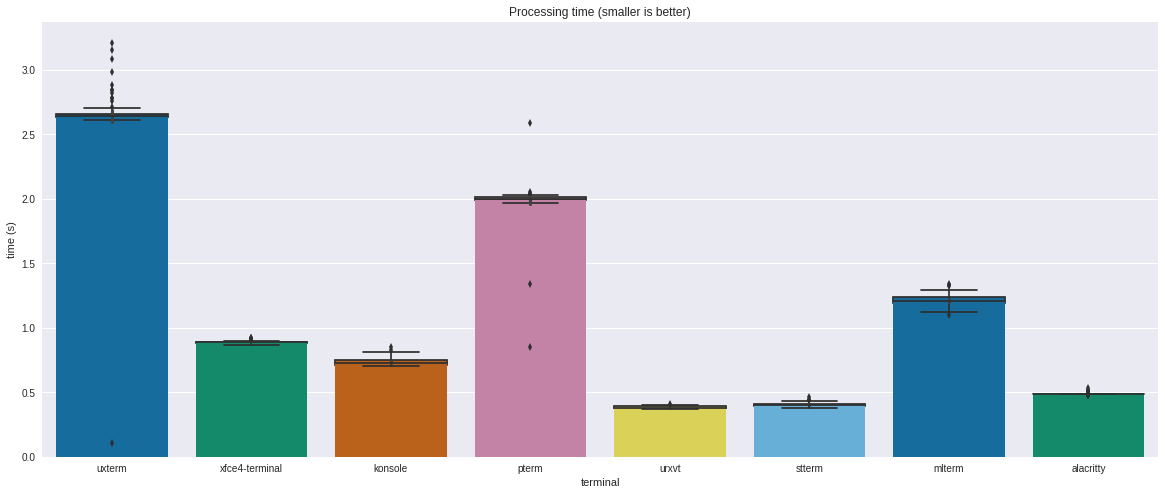

In [9]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

# lots of outliers in xterm, some in pterm, but others have too little variability
ax = sns.boxplot(data=data, x='terminal', y='time', palette='colorblind')
ax = sns.barplot(data=data, x='terminal', y='time', palette='colorblind')
ax.set_title('Processing time (smaller is better)')
ax.set_ylabel('time (s)')

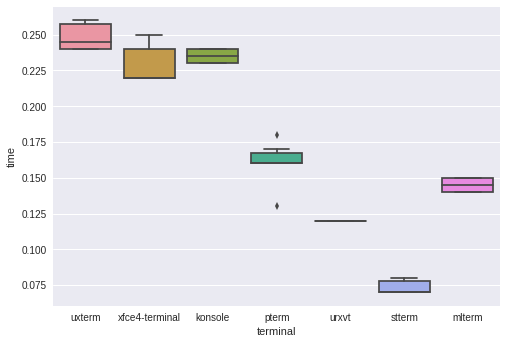

In [10]:
small = pandas.read_csv('times-10x10000.csv')
ax = sns.boxplot(data=small, x='terminal', y='time')

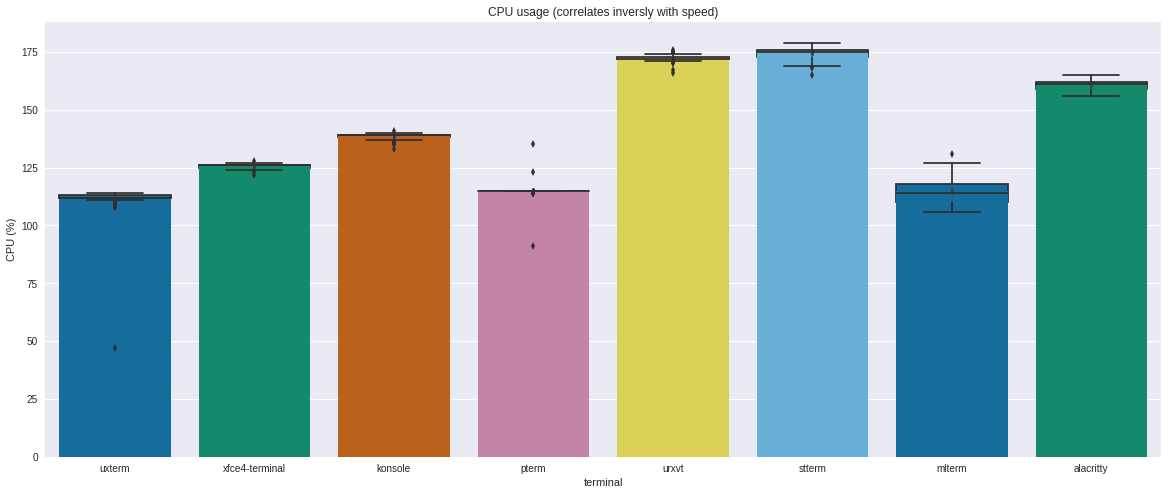

In [11]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.barplot(data=data, x='terminal', y='cpu', palette='colorblind')
ax = sns.boxplot(data=data, x='terminal', y='cpu', palette='colorblind')

ax.set_title('CPU usage (correlates inversly with speed)')
ax.set_ylabel('CPU (%)')

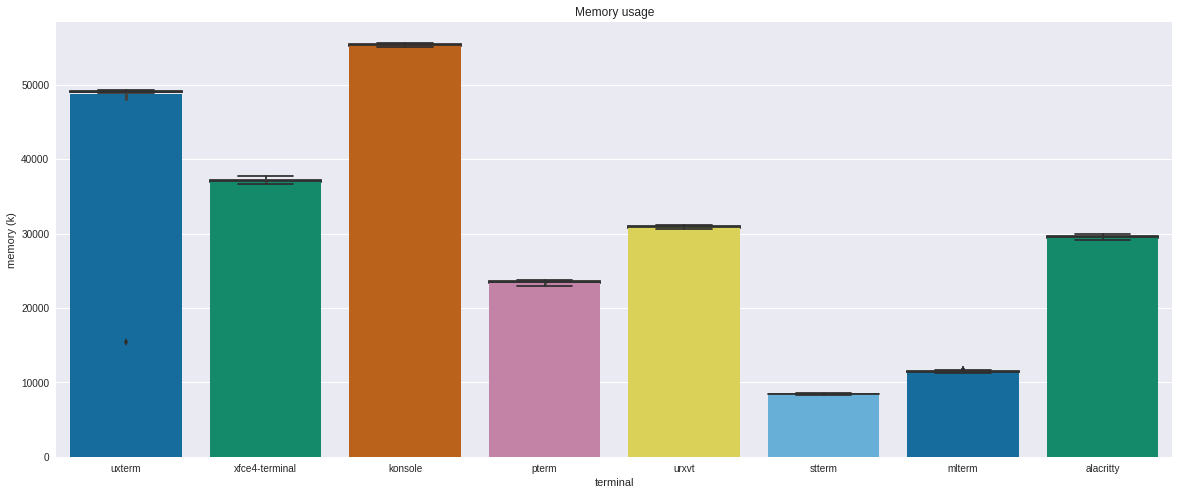

In [12]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

# no visible variability, apart from an outlier in xterm
ax = sns.boxplot(data=data, x='terminal', y='memory', palette='colorblind')
ax = sns.barplot(data=data, x='terminal', y='memory', palette='colorblind')
ax.set_title('Memory usage')
ax.set_ylabel('memory (k)')
